In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Análise Exploratória e Processamento de Dados

À medida que eu fui desenvolvendo o estudo, percebi que para mim estava fazendo mais sentido realizar a análise e o seu processamento. Portanto, a análise exploratória e o processamento de dados estão sendo desenvolvidos em conjunto.

## Contato inicial com o dataset

A ideia é apenas obter uma visão rápida e geral do que se trata o dataset e possível correções que eu posso aplicar

In [144]:
df = pd.read_csv('./data/cars.csv')

In [145]:
df

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,25-33,Bright Silver Metallic,Blond,0.0,1.0,0.0,Volvo Cars Danbury,4.2,4.2,2.0,250.0,34798.0
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front-wheel Drive,Gasoline,NaN,Red,Beige,NaN,NaN,NaN,NaN,NaN,4.5,101.0,NaN,12500.0
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,21-30,Ice White,Soft Beige,0.0,0.0,1.0,Dapper Car Sales,NaN,4.8,36.0,300.0,12299.0
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All-wheel Drive,Gasoline,20-29,Ice White,Off Black,1.0,0.0,0.0,Legend Auto Sales Inc.,4.6,4.7,62.0,1000.0,8995.0


In [146]:
df.shape

(762091, 20)

In [147]:
df.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [148]:
df.isnull().sum()

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64

In [149]:
df.duplicated().sum()

np.int64(9145)

Valores muito discrepantes de máximo e mínimo para price

In [150]:
df['price'].min()

np.float64(1.0)

In [151]:
df['price'].max()

np.float64(1000000000.0)

## Gerando a amostra aleatória

Geração de uma amostra **repordutível simples** e já tratando suas duplicatas

Garantindo que a amostra seja **reprodutível** rodando a célula abaixo

In [152]:
np.random.seed(33)

Eu escolhi gerar uma **amostra aleatória simples** de 25% do dataset

In [153]:
sample = df.sample(frac=0.25)
sample

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,NaN,B,NaN,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,NaN,4.8,13.0,NaN,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,NaN,63999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489863,Lincoln,Corsair Standard,2021,22369.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,0.0,1.0,0.0,Zeck Ford,4.9,4.8,9.0,500.0,32000.0
513217,Mercedes-Benz,GLC 300 Base 4MATIC,2020,51915.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,0.0,1.0,1.0,Mercedes-Benz of Massapequa,4.8,4.8,36.0,NaN,32217.0
59014,BMW,X3,2021,41279.0,NaN,AUTOMATIC,NaN,NaN,NaN,Glacier Silver Metallic,NaN,0.0,0.0,0.0,BMW of Cincinnati North,NaN,4.7,29.0,NaN,40000.0
314423,Honda,HR-V LX,2021,16722.0,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,1.0,1.0,1.0,West Herr Honda of Canandaigua,4.5,4.7,45.0,253.0,23892.0


In [154]:
sample.nunique()

manufacturer              30
model                   7992
year                      93
mileage                99257
engine                  3903
transmission             684
drivetrain                25
fuel_type                 23
mpg                      635
exterior_color          4675
interior_color          2663
accidents_or_damage        2
one_owner                  2
personal_use_only          2
seller_name            16936
seller_rating             41
driver_rating             30
driver_reviews_num       369
price_drop              4508
price                  36393
dtype: int64

In [155]:
sample.duplicated().sum()

np.int64(553)

Removendo as **duplicatas** da amostra

In [156]:
sample = sample.drop_duplicates()

## Tratando valores nulos das variáveis

Tratei os valores nulos do dataframe de forma que as variáveis **categóricas** fossem substituídas pela string **'Not Informed'** e as variáveis **númericas** pela **Moda** e **Mediana**

In [157]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [158]:
sample.isnull().sum()

manufacturer               0
model                      0
year                       0
mileage                  129
engine                  3699
transmission            2428
drivetrain              5365
fuel_type               5708
mpg                    35549
exterior_color          2224
interior_color         14182
accidents_or_damage     6098
one_owner               7941
personal_use_only       6275
seller_name             2188
seller_rating          53368
driver_rating           8014
driver_reviews_num         0
price_drop             87577
price                      0
dtype: int64

### Variáveis categóricas

In [159]:
object_sample_vars = sample[['engine', 'transmission', 'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'seller_name']]
object_sample_vars

,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,seller_name
191809,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,Blasius Pre-Owned Auto
488330,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,Maxkar Motors
713389,2.5L,Continuously Variable Transmission,NaN,B,NaN,SILVER SKY METALLIC,EA20,Charlie's Toyota
531766,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,Mercedes-Benz of Lynnwood
216502,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,NaN,Magnetic Metallic,Black,Grapevine Ford Lincoln
...,...,...,...,...,...,...,...,...
489863,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,Zeck Ford
513217,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,Mercedes-Benz of Massapequa
59014,NaN,AUTOMATIC,NaN,NaN,NaN,Glacier Silver Metallic,NaN,BMW of Cincinnati North
314423,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,West Herr Honda of Canandaigua


Preenchendo valores faltantes das colunas categóricas com **'Not Informed'**

In [160]:
sample = sample.copy()

for col_name in object_sample_vars:
    sample.loc[:, col_name] = sample[col_name].fillna('Not Informed')

### Variáveis numéricas

Com base em características das variáveis, separei algumas para serem preenchidas pela **moda** e outras pela **mediana**

'accidents_or_damage', 'one_owner' e 'personal_use_only' foram substituídas pela moda por possuírem apenas valores 0 e 1.<br>
'mileage','seller_rating', 'driver_rating' e 'price_drop' foram substituídas pela mediana por possuírem valores diversos.

In [161]:
mode_numeric_sample_vars = sample[['accidents_or_damage', 'one_owner', 'personal_use_only']]
median_numeric_sample_vars = sample[['mileage','seller_rating', 'driver_rating', 'price_drop']]

In [162]:
mode_numeric_sample_vars

,accidents_or_damage,one_owner,personal_use_only
191809,0.0,1.0,1.0
488330,0.0,0.0,1.0
713389,0.0,1.0,1.0
531766,0.0,0.0,0.0
216502,0.0,1.0,1.0
...,...,...,...
489863,0.0,1.0,0.0
513217,0.0,1.0,1.0
59014,0.0,0.0,0.0
314423,1.0,1.0,1.0


In [163]:
median_numeric_sample_vars

,mileage,seller_rating,driver_rating,price_drop
191809,94746.0,4.3,4.6,590.0
488330,55710.0,3.8,4.7,500.0
713389,15022.0,NaN,4.8,NaN
531766,78600.0,4.4,4.7,505.0
216502,70365.0,4.6,4.6,NaN
...,...,...,...,...
489863,22369.0,4.9,4.8,500.0
513217,51915.0,4.8,4.8,NaN
59014,41279.0,NaN,4.7,NaN
314423,16722.0,4.5,4.7,253.0


Preenchendo valores faltantes de colunas numéricas com a **moda**

In [164]:
for col_name in mode_numeric_sample_vars:
    mode = sample[col_name].mode()[0]
    sample.loc[:, col_name] = sample[col_name].fillna(mode)

Preenchendo valores faltantes de colunas numéricas com a **mediana**

In [165]:
for col_name in median_numeric_sample_vars:
    median = sample[col_name].median()
    sample.loc[:, col_name] = sample[col_name].fillna(median)

Nenhum registro nulo em nossa sample

In [166]:
sample.isnull().sum()

manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64

In [167]:
sample

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
191809,Ford,Focus S,2018,94746.0,2.0L I4 16V GDI DOHC Flexible Fuel,6-Speed Automatic with Auto-Shift,Front-wheel Drive,E85 Flex Fuel,25-34,Shadow Black,Charcoal Black,0.0,1.0,1.0,Blasius Pre-Owned Auto,4.3,4.6,202.0,590.0,10994.0
488330,Lincoln,MKZ Base,2014,55710.0,2.0L I4 16V GDI DOHC Turbo,6-Speed Automatic,Front-wheel Drive,Gasoline,22-33,White Platinum Tri-Coat Metallic,Charcoal Black,0.0,0.0,1.0,Maxkar Motors,3.8,4.7,69.0,500.0,17498.0
713389,Toyota,RAV4 Hybrid Limited,2022,15022.0,2.5L,Continuously Variable Transmission,Not Informed,B,Not Informed,SILVER SKY METALLIC,EA20,0.0,1.0,1.0,Charlie's Toyota,4.5,4.8,13.0,644.0,42995.0
531766,Mercedes-Benz,C-Class C300 4MATIC,2014,78600.0,Premium Unleaded V-6 3.5 L/213,Automatic,All-wheel Drive,Gasoline,20-27,Black,Black,0.0,0.0,0.0,Mercedes-Benz of Lynnwood,4.4,4.7,100.0,505.0,17995.0
216502,Ford,F-250 Platinum,2017,70365.0,6.7L V8 32V DDI OHV Turbo Diesel,6-Speed Automatic,Four-wheel Drive,Diesel,Not Informed,Magnetic Metallic,Black,0.0,1.0,1.0,Grapevine Ford Lincoln,4.6,4.6,163.0,644.0,63999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489863,Lincoln,Corsair Standard,2021,22369.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,21-29,Burgundy Velvet,Sandstone,0.0,1.0,0.0,Zeck Ford,4.9,4.8,9.0,500.0,32000.0
513217,Mercedes-Benz,GLC 300 Base 4MATIC,2020,51915.0,2.0L I4 16V GDI DOHC Turbo,9-Speed Automatic,All-wheel Drive,Gasoline,21-28,Polar White,Black,0.0,1.0,1.0,Mercedes-Benz of Massapequa,4.8,4.8,36.0,644.0,32217.0
59014,BMW,X3,2021,41279.0,Not Informed,AUTOMATIC,Not Informed,Not Informed,Not Informed,Glacier Silver Metallic,Not Informed,0.0,0.0,0.0,BMW of Cincinnati North,4.5,4.7,29.0,644.0,40000.0
314423,Honda,HR-V LX,2021,16722.0,1.8L I4 16V MPFI SOHC,Automatic CVT,All-wheel Drive,Gasoline,27-31,Silver,Gray,1.0,1.0,1.0,West Herr Honda of Canandaigua,4.5,4.7,45.0,253.0,23892.0



Para melhor entendimento do dataset, foram selecionadas algumas variáveis que proveram insights sobre as variáveis e possíveis limpezas/análises a se fazer

## Análise de variáveis

### Correlação de Pearson

Variáveis numéricas

In [168]:
corr= sample[['price', 'year', 'mileage', 'personal_use_only', 'accidents_or_damage', 'one_owner', 'seller_rating', 'driver_rating', 'driver_reviews_num']].corr()

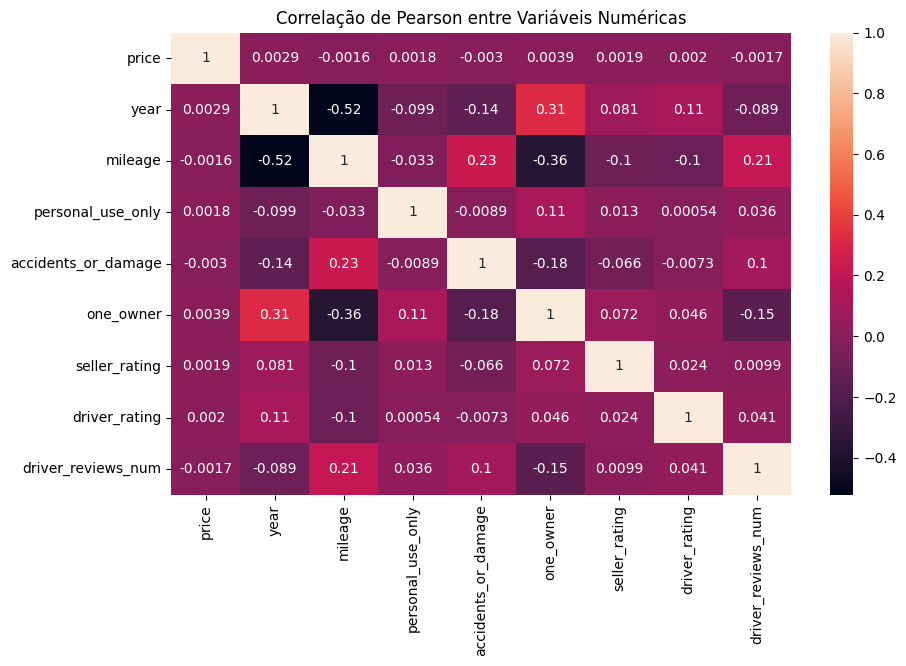

In [169]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True);
plt.title("Correlação de Pearson entre Variáveis Numéricas")
plt.show()

O heatmap evidencia que existem correlações **positivas** que estão classificadas em **muito fracas** e **fracas**<br>
As correlações **negativas** se encontram em **fracas** e **moderadas**


### year

In [170]:
sample['year'].value_counts()

year
2020    33498
2021    27138
2019    26347
2022    20036
2018    15729
        ...  
1948        1
1917        1
1937        1
1951        1
1946        1
Name: count, Length: 93, dtype: int64

In [171]:
sample['year'].min()

np.int64(1915)

Não faz sentido ter um carro do ano de **1915** no dataset.

In [172]:
sample['year'].max()

np.int64(2023)

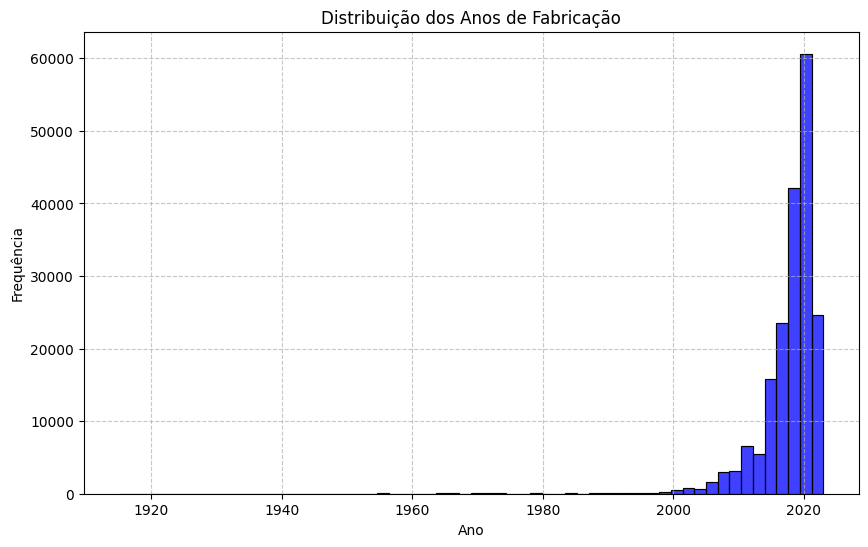

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=60, kde=False, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

Talvez seja interessante limitar o ano de fabricação de **2000 até 2023**

In [174]:
sample = sample[(sample['year'] >= 2000) & (sample['year'] <= 2023)]

In [175]:
sample.shape

(188466, 20)

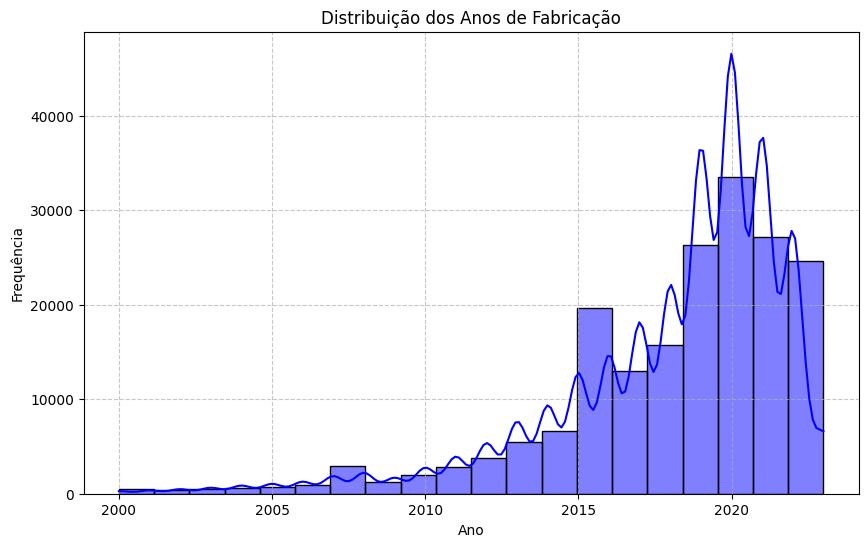

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(sample['year'], bins=20, kde=True, color='blue')
plt.title('Distribuição dos Anos de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

O tratamento da variável *year* de forma manual permitiu a remoção de registros discrepantes que não acrescentariam na análise, além de evidenciar o **alto pico na distribuição no ano de 2020**, o que indica muitos carros foram fabricados nesse ano.

### price

É possível perceber que o **desvio padrão** está muito alto em relação à **média**, então a coluna *price* deve possuir **muitos outliers**

In [177]:
sample['price'].describe()

count    1.884660e+05
mean     3.781306e+04
std      2.303519e+06
min      1.000000e+00
25%      1.967500e+04
50%      2.799000e+04
75%      3.943700e+04
max      1.000000e+09
Name: price, dtype: float64

#### Método IQR

Este método tem como objetivo representar a amplitude do conjunto de dados de **forma central** por meio da distância entre o primeiro quartil(separa os 25% menores valores do restante dos dados) e o terceiro quartil(separa os 25% maiores valores do restante dos dados).

In [179]:
sample.shape

(188466, 20)

In [178]:
sample.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,188466.000000,1.884660e+05,188466.00000,188466.000000,188466.000000,188466.000000,188466.000000,188466.000000,188466.000000,1.884660e+05
mean,2018.067705,5.555846e+04,0.22222,0.582890,0.666476,4.254026,4.627717,90.273004,837.274113,3.781306e+04
std,3.818919,4.322693e+04,0.41574,0.493083,0.471473,0.701367,0.269512,115.298449,976.629237,2.303519e+06
min,2000.000000,0.000000e+00,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.325425e+04,0.00000,0.000000,0.000000,4.100000,4.500000,14.000000,571.250000,1.967500e+04
50%,2019.000000,4.552150e+04,0.00000,1.000000,1.000000,4.500000,4.700000,51.000000,644.000000,2.799000e+04
75%,2021.000000,7.800000e+04,0.00000,1.000000,1.000000,4.600000,4.800000,120.000000,750.000000,3.943700e+04
max,2023.000000,1.119067e+06,1.00000,1.000000,1.000000,5.000000,5.000000,1025.000000,50004.000000,1.000000e+09


É possível observar extremos muito grandes, por exemplo:<br>
min = 1.0<br>
max = 1000000000.0

In [182]:
sample['price'].min(), sample['price'].max()

(np.float64(1.0), np.float64(1000000000.0))

In [203]:
Q1_price = sample['price'].quantile(0.25)
Q3_price = sample['price'].quantile(0.75)

print("1ª Quartil: ", Q1_price)
print("3º Quartil: ", Q3_price)

1ª Quartil:  19675.0
3º Quartil:  39437.0


In [184]:
IQR_price = Q3_price - Q1_price

print("IQR de price: ", IQR_price)

IQR de price:  19762.0


Os valores são considerados outliers se estiverem fora desse intervalo(limites):

Para **outliers inferiores**: Q1 − 1.5 * IQR<br>
Para **outliers superiores**: Q3 + 1.5 * IQR

In [204]:
lower_limit = Q1_price - (1.5 * IQR_price)
higher_limit = Q3_price + (1.5 * IQR_price)

print("Limite inferior: ", lower_limit)
print("Limite superior: ", higher_limit)

Limite inferior:  -9968.0
Limite superior:  69080.0


In [209]:
price_outliers = sample[(sample['price'] < lower_limit) | (sample['price'] > higher_limit)]

In [210]:
outlier_values = price_outliers['price'].sort_values().tolist()
print("Valores outliers:", outlier_values)

Valores outliers: [69100.0, 69111.0, 69112.0, 69115.0, 69125.0, 69140.0, 69173.0, 69184.0, 69190.0, 69190.0, 69190.0, 69191.0, 69200.0, 69206.0, 69206.0, 69206.0, 69210.0, 69215.0, 69233.0, 69256.0, 69259.0, 69280.0, 69280.0, 69287.0, 69290.0, 69291.0, 69307.0, 69308.0, 69323.0, 69366.0, 69370.0, 69371.0, 69376.0, 69376.0, 69383.0, 69383.0, 69385.0, 69390.0, 69393.0, 69400.0, 69400.0, 69410.0, 69420.0, 69421.0, 69434.0, 69435.0, 69436.0, 69437.0, 69446.0, 69451.0, 69457.0, 69462.0, 69477.0, 69478.0, 69481.0, 69490.0, 69492.0, 69493.0, 69494.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69495.0, 69496.0, 69497.0, 69498.0, 69499.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69500.0, 69511.0, 69518.0, 69520.0, 69521.0, 69523.0, 69533.0, 69534.0, 69545.0, 69550.0, 69555.0, 69557.0, 69571.0, 69573.0, 69575.0, 69577.0, 69580.0, 69581.0, 69586.0, 69588.0, 

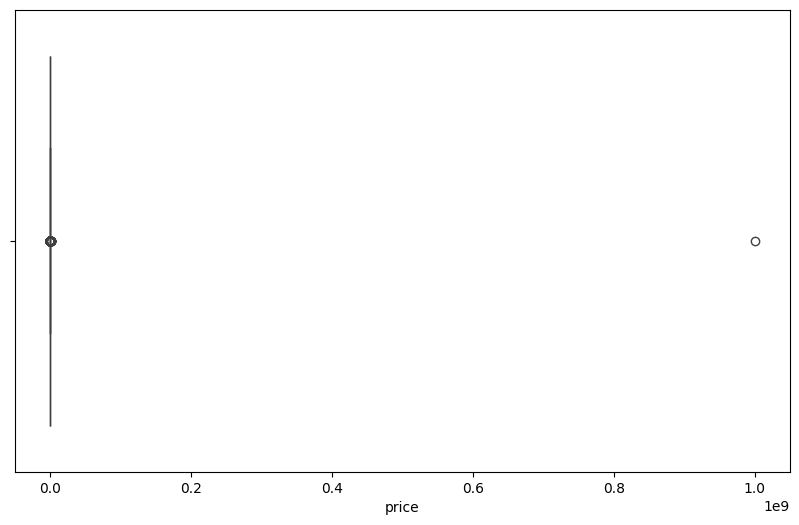

In [188]:
plt.figure(figsize=(10,6))
sns.boxplot(x=sample['price'])
plt.show()

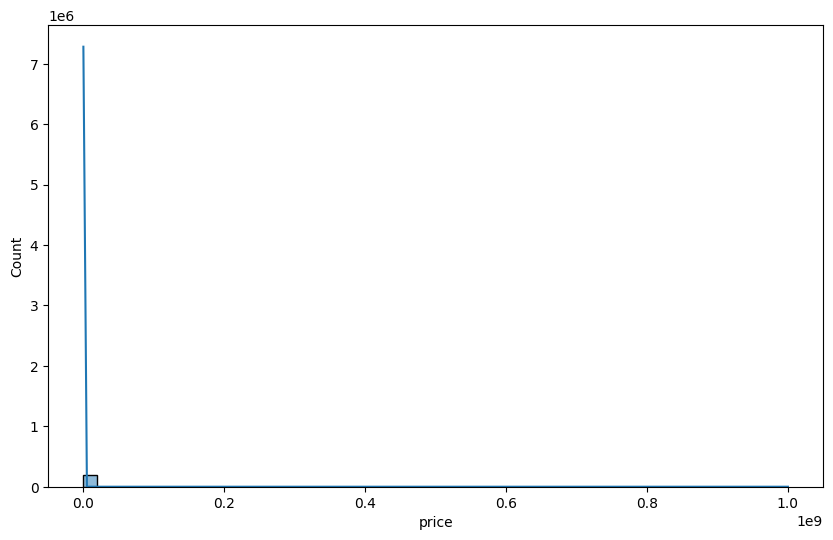

In [189]:
plt.figure(figsize=(10,6))
sns.histplot(sample['price'], kde=True, bins=50)
plt.show()

Os outliers que foram verificados pela análise utilizando o *IQR* e o *Boxplot* **não podem** ser removidos da análise, pois isso afetaria consideravelmente os resultados obtidos.

### mileage

In [190]:
sample['mileage'].min()

np.float64(0.0)

In [191]:
zero_mileage_count = (sample['mileage'] == 0.0).sum()
print("Quantidade de valores 0.0 em mileage:", zero_mileage_count)

Quantidade de valores 0.0 em mileage: 283


Não faz sentido o carro ter **0.0 milhas percorridas**, se é um dataset de **carros usados**

In [192]:
sample['mileage'].max()

np.float64(1119067.0)

### accidents_or_damage

In [193]:
sample['accidents_or_damage'].value_counts()

accidents_or_damage
0.0    146585
1.0     41881
Name: count, dtype: int64

### one_owner

In [194]:
sample['one_owner'].value_counts()

one_owner
1.0    109855
0.0     78611
Name: count, dtype: int64

### personal_use_only

In [195]:
sample['personal_use_only'].value_counts()

personal_use_only
1.0    125608
0.0     62858
Name: count, dtype: int64

### manufacturer

In [196]:
sample.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

In [197]:
sample['manufacturer'].value_counts()

manufacturer
Ford             19775
Toyota           14820
Chevrolet        13633
Nissan           12160
Jeep             10304
Mercedes-Benz    10005
BMW               9347
Honda             9238
Kia               8862
GMC               7231
Subaru            6077
Dodge             6069
Volkswagen        6002
Hyundai           5551
Lexus             5342
RAM               4799
Audi              4497
Cadillac          4401
Mazda             3836
Buick             3604
INFINITI          3148
Chrysler          3094
Land Rover        3069
Porsche           2766
Lincoln           2570
Volvo             2474
Acura             2102
Tesla             1458
Mitsubishi        1399
Jaguar             833
Name: count, dtype: int64

In [198]:
most_expensive_car = sample[sample['price'] == sample['price'].max()]
most_expensive_car

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
188260,Dodge,Durango Citadel,2018,113207.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,18-25,DB Black Clearcoat,Black,0.0,1.0,1.0,"Rothrock Nissan, Chrysler, Dodge, Jeep, RAM",4.6,4.8,146.0,644.0,1.000000e+09


In [199]:
cheapest_car = sample[sample['price'] == sample['price'].min()]
cheapest_car

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
735177,Volkswagen,Jetta,2007,133964.0,2.5L I5 20V MPFI DOHC,5-Speed Manual,Front-wheel Drive,Gasoline,22-30,SELECT,Not Informed,1.0,0.0,1.0,Fred Anderson Kia,4.4,4.1,72.0,644.0,1.0


### fueltype

In [200]:
sample['fuel_type'].value_counts()

fuel_type
Gasoline                         159741
Hybrid                             7412
Diesel                             6875
Not Informed                       5222
E85 Flex Fuel                      4596
Electric                           4047
B                                   339
Flexible Fuel                       117
Plug-In Hybrid                       27
Gasoline/Mild Electric Hybrid        22
Gasoline Fuel                        21
G                                    12
Premium Unleaded                     11
Regular Unleaded                     10
Compressed Natural Gas                5
Diesel Fuel                           2
PHEV                                  1
Hybrid Fuel                           1
Premium                               1
Other                                 1
Premium (Required)                    1
E85 Fl                                1
Biodiesel                             1
Name: count, dtype: int64

Com essa quantidade de tipos de combustíveis com poucas ocorrências, é possível agrupá-los em um único tipo, como **'Outros'**<br>
Por exemplo, a partir do combustível *B*

### transmission

In [201]:
sample['transmission'].value_counts()

transmission
6-Speed Automatic                                36932
8-Speed Automatic                                34625
Automatic CVT                                    27300
Automatic                                        23776
9-Speed Automatic                                15318
                                                 ...  
8-Speed Geartronic Automatic                         1
Compact 5-Speed Automatic                            1
6-speed automatic transmission w/Commandshift        1
Auto, 6-Spd SKYACTIV-Drv                             1
continuously variable (ecvt)                         1
Name: count, Length: 548, dtype: int64

### drivetrain

In [202]:
sample['drivetrain'].value_counts()

drivetrain
Front-wheel Drive                                              60163
All-wheel Drive                                                57620
Four-wheel Drive                                               38949
Rear-wheel Drive                                               23495
Not Informed                                                    4781
FWD                                                             1565
AWD                                                              890
4WD                                                              450
RWD                                                              421
All-Wheel Drive                                                   29
Front-Wheel Drive                                                 22
Four-Wheel Drive                                                  12
Front-Wheel Drive with Limited-Slip Differential                  11
Four-Wheel Drive with Locking and Limited-Slip Differential       11
Unknown                